**Assignment 4** for the course of *Selected Topics in Music and Acoustic Engineering* : 

***Machine Learning for Audio and Acoustic Engineering*** 

helded by Professor *Maximo Cobos*.

---

STUDENTS GROUP:

+ **Fotios Koutsoukos**, ID: 941257

+ **Antonio Giganti**, ID: 925671

Link to the **[Google Colab](https://colab.research.google.com/drive/1pS4zFwl6zdsf0zQScLW_3a0fFGp0yTUn?usp=sharing)** file.


If the textlink is not clickable, copy & paste the following link in your browser:
https://colab.research.google.com/drive/1pS4zFwl6zdsf0zQScLW_3a0fFGp0yTUn?usp=sharing

---

# **Lab 4: Neural Networks (II)**


In this lab we will continue exploring different types of deep architectures for audio processing, and we will pay special attention to system evaluation.


In [1]:
# As always, we import the relevant packages
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import librosa
import sklearn
import tensorflow as tf
plt.style.use('seaborn')

### **Exercise 1**: Data Preparation I

We will continue working with the ESC-50 dataset. Download it to your notebook following the same steps as in Lab 2 and Lab 3.

In [ ]:
!apt-get install subversion
!svn checkout https://github.com/karolpiczak/ESC-50/trunk/audio

Create a list containing the audio files and another one with the corresponding labels (as in Lab 3):

In [3]:
audiofiles = [str(file) for file in Path().glob('audio/*.wav')]
labels = []
for i,file in enumerate(audiofiles):
  fileid = file.split('.wav')[-2]
  target = fileid.split('-')[-1]
  labels.append(int(target))

Instead of working with 50 classes, we limit our dataset to only 10 classes. Filter you two files (the one with file paths and the one with labels) to contain only those belonging to classes [0-9].

In [4]:
files = [audiofiles[i] for i,l in enumerate(labels) if l<10]
labels = [l for l in labels if l<10]

We load the signals and get the Mel spectrogram for each signal. Create a list called "signals" storing the raw waveforms of each file in your list and another one called "melspecs" that stores the Mel spectrogram for each signal.

In [5]:
signals = list(librosa.load(file)[0] for file in files)
melspecs = list(librosa.feature.melspectrogram(signal) for signal in signals)

### **Exercise 2**: Data preparation II



Convert your "melspecs" and "labels" list to numpy arrays, called "Xdata" and "Ydata". 
Check that the result has size (400, 128, 216) for Xdata and (400,) for Ydata.

In [6]:
Xdata = np.asarray(melspecs)
Ydata = np.asarray(labels)

print('Xdata shape: {} \nYata shape: {}'.format(Xdata.shape, Ydata.shape))

Xdata shape: (400, 128, 216) 
Yata shape: (400,)


(400,)


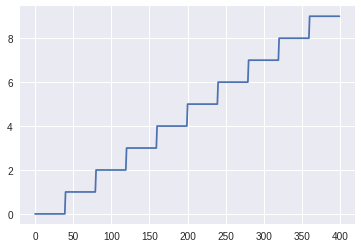

In [139]:
#Ydata, class distribution is balanced
sorted=np.sort(Ydata)
print(sorted.shape)
plt.plot(sorted)

Split your dataset into 3 partitions, 1 for training (70%), 1 for validation (20%) and 1 for test (10%). Check that the resulting arrays have the correct shape:


*   X_train $\rightarrow$ (280,128,216)
*   X_val $\rightarrow$ (80,128,216)
*   X_test $\rightarrow$ (40,128,216)
*   y_train $\rightarrow$ (280,)
*   y_val $\rightarrow$ (80,)
*   y_test $\rightarrow$ (40,)

In [7]:
from sklearn.model_selection import train_test_split

train_size = 0.7
val_size = 0.2
test_size = 0.1

seed=1234

a = np.round((1.0 - train_size), 2)
b = np.round(test_size/(test_size + val_size), 2)

X_train, X_temp, y_train, y_temp = train_test_split(Xdata, Ydata, test_size=a, random_state=seed, shuffle=True, stratify=Ydata)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=b, random_state=seed, shuffle=True, stratify=y_temp)


In [8]:
# Shapes for each partition
print('X_train shape: {} \nX_val shape: {} \nX_test shape: {} \ny_train shape: {} \ny_val shape: {} \ny_test shape: {} \n'.format(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape))

X_train shape: (280, 128, 216) 
X_val shape: (80, 128, 216) 
X_test shape: (40, 128, 216) 
y_train shape: (280,) 
y_val shape: (80,) 
y_test shape: (40,) 



In the next exercise we will create a time-distributed 1D-CNN to process our dataset. By default, Keras assumes that the last dimension corresponds to the number of channels in our input. Since we are going to use 1D-CNN, each frequency band will be processed as an independent frequency channel. Therefore, we need to reorder the dimensions in our data to move the frequency channels to the last dimension.

Use the numpy function "moveaxis" to create the data matrices X_train_rs, X_val_rs and X_test_rs, with dimensions (280, 216, 128), (80, 216, 128) and (40, 216, 128):

In [9]:
X_train_rs = np.moveaxis(X_train, 1, -1)
X_val_rs = np.moveaxis(X_val, 1, -1)
X_test_rs = np.moveaxis(X_test, 1, -1)

print('X_train_rs shape: {} \nX_val_rs shape: {} \nX_test_rs shape: {}'.format(X_train_rs.shape, X_val_rs.shape, X_test_rs.shape))

X_train_rs shape: (280, 216, 128) 
X_val_rs shape: (80, 216, 128) 
X_test_rs shape: (40, 216, 128)


### **Exercise 3**: 1D-Convolutional Neural Network



Create the following 1D-CNN architecture with Keras:

-

-

-

-

-

-

-

-

-


In [21]:
#create a convolutional structure
input_shape = (X_train_rs.shape[1], X_train_rs.shape[2]) 
print('INPUT SHAPE: ', input_shape)
model = tf.keras.models.Sequential()
#1st Conv layer
model.add(tf.keras.layers.Conv1D(16, 9, activation='relu',input_shape=input_shape, name='CONV1'))
model.add(tf.keras.layers.MaxPooling1D(2, padding='same', name='MP1'))
model.add(tf.keras.layers.BatchNormalization(name='BATCH1'))
#2nd Conv layer
model.add(tf.keras.layers.Conv1D(16, 3, activation='relu', name='CONV2'))
model.add(tf.keras.layers.MaxPooling1D(2, padding='same', name='MP2'))
model.add(tf.keras.layers.BatchNormalization(name='BATCH2'))
#3rd Conv layer
model.add(tf.keras.layers.Conv1D(32, 3, activation='relu', name='CONV3'))
model.add(tf.keras.layers.MaxPooling1D(2, padding='same', name='MP3'))
model.add(tf.keras.layers.BatchNormalization(name='BATCH3'))
#flat the output, thus i can feed it to a dense layer
model.add(tf.keras.layers.Flatten(name='FLATTEN'))
model.add(tf.keras.layers.Dense(32, activation='relu', name='DENSE'))
#model.add(tf.keras.layers.Dropout(0.5))
#output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='SOFTMAX')) #10 output classes
model.summary()

INPUT SHAPE:  (216, 128)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CONV1 (Conv1D)               (None, 208, 16)           18448     
_________________________________________________________________
MP1 (MaxPooling1D)           (None, 104, 16)           0         
_________________________________________________________________
BATCH1 (BatchNormalization)  (None, 104, 16)           64        
_________________________________________________________________
CONV2 (Conv1D)               (None, 102, 16)           784       
_________________________________________________________________
MP2 (MaxPooling1D)           (None, 51, 16)            0         
_________________________________________________________________
BATCH2 (BatchNormalization)  (None, 51, 16)            64        
_________________________________________________________________
CONV3 (Conv1D)               

Iniatialize Keras Callbacks:

*   CSVLogger.
*   Early_Stop with patience 100 epochs, working on validation loss.
*   ModelCheckpoint working on validation accuracy (monitor = 'val_accuracy').

In [22]:
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ModelCheckpoint

#for csv logger
log_file_path = '1D_CNN_Classifier_training.log'
csv_logger = CSVLogger(log_file_path, append=False)

#for early stopping
patience = 100
early_stop = EarlyStopping('val_loss', patience = patience)

#for model checkpoint
model_name = '1D_CNN_Classifier.hdf5'
model_checkpoint = ModelCheckpoint(filepath = model_name, monitor = 'val_accuracy', verbose = 1, save_best_only = True) 

#we store all these callbacks in a list, Callback list
callbacks = [model_checkpoint, csv_logger, early_stop]

Train the network using Adam optimizer and a batch size of 32. Remember to include the created callbacks.

In [23]:
X_train_rs.shape

(280, 216, 128)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size=32
history = model.fit(X_train_rs, y_train, validation_data=(X_val_rs, y_val), batch_size=batch_size, epochs=1000, callbacks = callbacks)

Plot the training history. What is your best validation accuracy?

Best validation accuracy:  0.5249999761581421


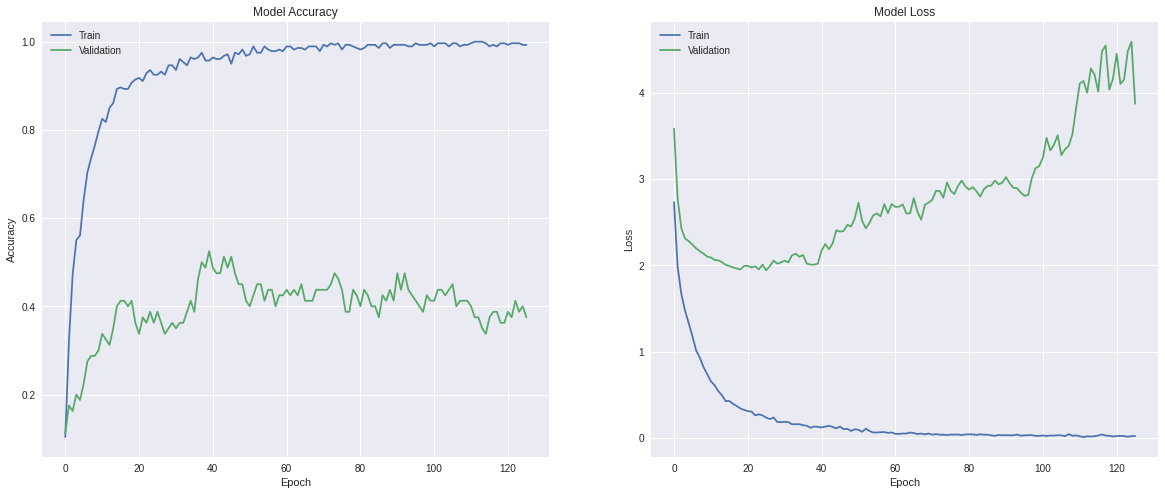

In [14]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
#plt.ylim(0, 1)


plt.subplot(1,2,2)
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
#plt.ylim(0, 2);

#best validation accuracy
best_acc = np.max(history.history['val_accuracy'])
print('Best validation accuracy: ', best_acc)

*We can see that our model is overfitting after epoch 20. However the best val_accuracy is obtained around epoch 40, and this is the model we save.
It would be wise to save the model based on the minimum val_loss achived at epoch 12 since the gradient descent is based on the loss and not on the accuracy.*

Evaluate the model over the test dataset. What is your test accuracy? Is it better or worse than the one in your validation set?

*We restore the weights from the same model based on the best val_accuracy. If we did not restore the weights, the model weights would be the ones of the last training epoch, where the network is overfitting.*

In [25]:
#restore weights
model.load_weights(str('1D_CNN_Classifier.hdf5'), by_name=False)

In [26]:
[loss_test, acc_test] = model.evaluate(X_test_rs, y_test)
print('Test Loss: {} \nTest Accuracy: {}'.format(loss_test, acc_test))

[loss_val, acc_val] = model.evaluate(X_val_rs, y_val)
print('Val Loss: {} \nVal Accuracy: {}'.format(loss_val, acc_val))

2/2 [==============================] - 0s 5ms/step - loss: 2.7627 - accuracy: 0.2750
Test Loss: 2.7627148628234863 
Test Accuracy: 0.2750000059604645
3/3 [==============================] - 0s 4ms/step - loss: 2.8718 - accuracy: 0.4000
Val Loss: 2.8718104362487793 
Val Accuracy: 0.4000000059604645


*After restoring the weights, the validation accuracy is far better than the test because the model weights are the ones that correspond to the best val accuracy and not the best val loss that would be the correct metric to generalize. That is why the performance on an unseen test set is very bad.*

### **Exercise 4**: 1D-CNN Evaluation

Plot your confusion matrix for the validation set and for your test set:

In [39]:
#generate the predictions
pred_val = model.predict(X_val_rs)
pred_test = model.predict(X_test_rs)

pred_val = np.argmax(pred_val, axis=1)
pred_test = np.argmax(pred_test, axis=1)

In [101]:
classList = np.arange(10)

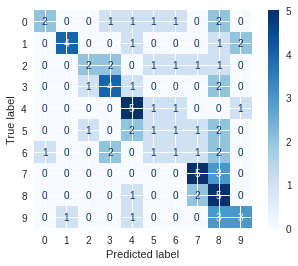

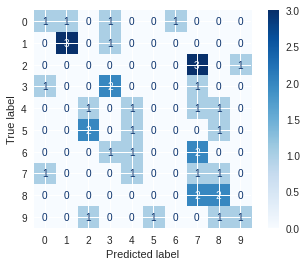

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, pred_val) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classList)
disp.plot(cmap='Blues')


cm = confusion_matrix(y_test, pred_test) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classList)
disp.plot(cmap='Blues')

*As we can see, the confusion matrix for the test set is much worse that the validation.*

### **Exercise 5**: Time-Distributed 1D-CNN

In the previous 1D-CNN, each band of the Mel-spectrogram was treated as an independent channel. We want to continue using a similar 1D-CNN architecture but this time using a time-distributed model. Now the input will have several time steps (frames in this case) and 1 single channel.

Reshape your input X_train_rs to create a new input X_train_rss with dimensions (280, 216, 128, 1). You can use numpy's expand_dims.

In [51]:
print(X_train_rs.shape, X_val_rs.shape) 

(280, 216, 128) (80, 216, 128)


In [84]:
X_train_rss = np.expand_dims(X_train_rs, axis=3)
X_val_rss = np.expand_dims(X_val_rs, axis=3)
X_test_rss = np.expand_dims(X_test_rs, axis=3)
print(X_train_rss.shape, X_val_rss.shape, X_test_rss.shape) 

(280, 216, 128, 1) (80, 216, 128, 1) (40, 216, 128, 1)


Create your time-distributed network. A good thing of time-distributed networks is that the time-step dimension does not have to be fixed (it can be None). Thus, you can specify your input shape as:

input_shape = (None, 128, 1)



In [73]:
#create a time distributed structure
input_shape = (None, X_train_rss.shape[2], X_train_rss.shape[3]) 
print('INPUT SHAPE: ', input_shape)
modeltd = tf.keras.models.Sequential()
#1st Conv layer
modeltd.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(16, 9, activation='relu', name='CONV1'),input_shape=input_shape))
modeltd.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling1D(2, padding='same', name='MP1')))
modeltd.add(tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization(name='BATCH1')))
#2nd Conv layer
modeltd.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(16, 3, activation='relu', name='CONV2')))
modeltd.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling1D(2, padding='same', name='MP2')))
modeltd.add(tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization(name='BATCH2')))
#3rd Conv layer
modeltd.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, activation='relu', name='CONV3')))
modeltd.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling1D(2, padding='same', name='MP3')))
modeltd.add(tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization(name='BATCH3')))
#flat the output, thus i can feed it to a dense layer
modeltd.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten(name='FLATTEN')))
modeltd.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu', name='DENSE')))
#output layer
modeltd.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10, activation='softmax', name='SOFTMAX'))) #10 output classes
modeltd.add(tf.keras.layers.GlobalAveragePooling1D())
modeltd.summary()

INPUT SHAPE:  (None, 128, 1)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_51 (TimeDis (None, None, 120, 16)     160       
_________________________________________________________________
time_distributed_52 (TimeDis (None, None, 60, 16)      0         
_________________________________________________________________
time_distributed_53 (TimeDis (None, None, 60, 16)      64        
_________________________________________________________________
time_distributed_54 (TimeDis (None, None, 58, 16)      784       
_________________________________________________________________
time_distributed_55 (TimeDis (None, None, 29, 16)      0         
_________________________________________________________________
time_distributed_56 (TimeDis (None, None, 29, 16)      64        
_________________________________________________________________
time_distributed_57 (Time

Train the model using the same callbacks as before.

In [75]:
#for csv logger
log_file_path = '1D_CNN_TD_Classifier_training.log'
csv_logger = CSVLogger(log_file_path, append=False)

#for early stopping
patience = 100
early_stop = EarlyStopping('val_loss', patience = patience)

#for model checkpoint
model_name = '1D_CNN_TD_Classifier.hdf5'
model_checkpoint = ModelCheckpoint(filepath = model_name, monitor = 'val_accuracy', verbose = 1, save_best_only = True) 

#we store all these callbacks in a list, Callback list
callbacks = [model_checkpoint, csv_logger, early_stop]

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
modeltd.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size=32
historytd = modeltd.fit(X_train_rss, y_train, validation_data=(X_val_rss, y_val), batch_size=batch_size, epochs=1000, callbacks = callbacks)

Plot the training history.

Best validation accuracy:  0.7875000238418579


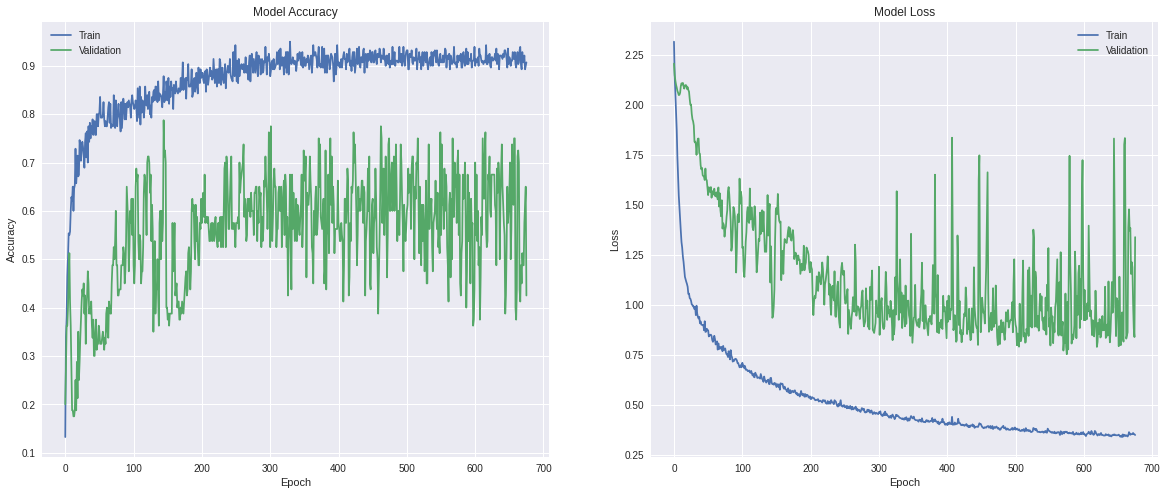

In [79]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(historytd.history['accuracy']) 
plt.plot(historytd.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
#plt.ylim(0, 1)


plt.subplot(1,2,2)
plt.plot(historytd.history['loss']) 
plt.plot(historytd.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
#plt.ylim(0, 2);

#best validation accuracy
best_acc = np.max(historytd.history['val_accuracy'])
print('Best validation accuracy: ', best_acc)

Plot the validation and test confusion matrices:

In [81]:
#restore weights
modeltd.load_weights(str('1D_CNN_TD_Classifier.hdf5'), by_name=False)

In [85]:
#generate the predictions
pred_val_td = modeltd.predict(X_val_rss)
pred_test_td = modeltd.predict(X_test_rss)

pred_val_td = np.argmax(pred_val_td, axis=1)
pred_test_td = np.argmax(pred_test_td, axis=1)

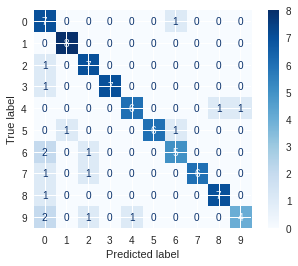

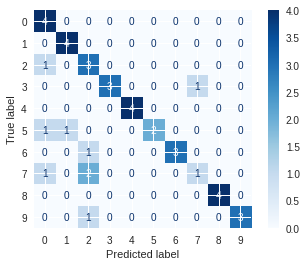

In [86]:
cm = confusion_matrix(y_val, pred_val_td) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classList)
disp.plot(cmap='Blues')

cm = confusion_matrix(y_test, pred_test_td) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classList)
disp.plot(cmap='Blues')

*The time distributed model that averages the predictions of all frames of a single track performs way better that the simple CNN model.*

### **Exercise 6**: Performance metrics

Use sklearn "classification_report" to analyze the performance of the classifier for each class in terms of Precision, Recall and F1.

Show the classification report for evaluation set. Discuss the results.

In [119]:
len(np.unique(y_val)), len(np.unique(pred_val_td)), len(np.unique(classList))

(10, 10, 10)

In [120]:
from sklearn.metrics import classification_report

print(classification_report(y_val, pred_val_td))

              precision    recall  f1-score   support

           0       0.47      0.88      0.61         8
           1       0.89      1.00      0.94         8
           2       0.70      0.88      0.78         8
           3       1.00      0.88      0.93         8
           4       0.86      0.75      0.80         8
           5       1.00      0.75      0.86         8
           6       0.71      0.62      0.67         8
           7       1.00      0.75      0.86         8
           8       0.88      0.88      0.88         8
           9       0.80      0.50      0.62         8

    accuracy                           0.79        80
   macro avg       0.83      0.79      0.79        80
weighted avg       0.83      0.79      0.79        80



*The dataset is balanced and we can verify that the support is equal among all classes. Since we have a balanced dataset, we can use precision and recall as is, without custom weights.*

Show the classification report for the test set. Discuss the results.

In [126]:
print(classification_report(y_test, pred_test_td))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       0.80      1.00      0.89         4
           2       0.43      0.75      0.55         4
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         4
           5       1.00      0.50      0.67         4
           6       1.00      0.75      0.86         4
           7       0.50      0.25      0.33         4
           8       1.00      1.00      1.00         4
           9       1.00      0.75      0.86         4

    accuracy                           0.78        40
   macro avg       0.83      0.78      0.77        40
weighted avg       0.83      0.78      0.77        40



*The accuracy results between the two sets are similar, showing that the networks predictions are coherent and generalizes well. There are classes that are more difficult to predict, but this is not due to unbalanced data. Since we are training over a small dataset, the metrics are noisy, as we do not have truly equal results between validation and test.*

### **Exercise 7**: Hybrid CNN-RNN

In this last exercise we are going to mix our previous time-distributed model with a LSTM layer to create a Hybrid CNN-RNN architecture.

Adapt your previous time-distributed model to match the following summary:

In [ ]:
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   

# Time-Dist Conv1D             (None, None, 120, 16)     160       
# _________________________________________________________________
# Time-Dist MaxPool1D 1D       (None, None, 60, 16)      0         
# _________________________________________________________________
# Time-Dist Dropout (0.5)      (None, None, 60, 16)      0         
# _________________________________________________________________
# Time-Dist Conv1D             (None, None, 58, 16)      784       
# _________________________________________________________________
# Time-Dist MaxPool1D          (None, None, 29, 16)      0         
# _________________________________________________________________
# Time-Dist Dropout (0.5)      (None, None, 29, 16)      0         
# _________________________________________________________________
# Time-Dist Conv1D             (None, None, 27, 32)      1568      
# _________________________________________________________________
# Time-Dist Dropout (0.5)      (None, None, 27, 32)      0         
# _________________________________________________________________
# Time-Dist MaxPool1D          (None, None, 14, 32)      0         
# _________________________________________________________________
# Time-Dist Flatten            (None, None, 448)         0         
# _________________________________________________________________
# LSTM  (16 neurons)           (None, None, 16)          29760     
# _________________________________________________________________
# Global Av. Pooling 1D        (None, 16)                0         
# _________________________________________________________________
# Dropout (0.35)               (None, 16)                0         
# _________________________________________________________________
# Dense                        (None, 10)                170       

# Total params: 32,442
# Trainable params: 32,442
# Non-trainable params: 0
# _________________________________________________________________


In [172]:
#create a time distributed structure
input_shape = (None, X_train_rss.shape[2], X_train_rss.shape[3]) 
print('INPUT SHAPE: ', input_shape)
model_hyb = tf.keras.models.Sequential()
#1st Conv layer
model_hyb.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(16, 9, activation='relu', name='CONV1'),input_shape=input_shape))
model_hyb.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling1D(2, padding='same', name='MP1')))
model_hyb.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
#2nd Conv layer
model_hyb.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(16, 3, activation='relu', name='CONV2')))
model_hyb.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling1D(2, padding='same', name='MP2')))
model_hyb.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
#3rd Conv layer
model_hyb.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, activation='relu', name='CONV3')))
model_hyb.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5)))
model_hyb.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling1D(2, padding='same', name='MP3')))
#flat the output
model_hyb.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten(name='FLATTEN')))
#LSTM part
model_hyb.add(tf.keras.layers.LSTM(16, name="LSTM", return_sequences=True))
model_hyb.add(tf.keras.layers.GlobalAveragePooling1D())
model_hyb.add(tf.keras.layers.Dropout(0.35))
#output layer
model_hyb.add(tf.keras.layers.Dense(10, activation='softmax', name='SOFTMAX')) 
model_hyb.summary()

INPUT SHAPE:  (None, 128, 1)
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_270 (TimeDi (None, None, 120, 16)     160       
_________________________________________________________________
time_distributed_271 (TimeDi (None, None, 60, 16)      0         
_________________________________________________________________
time_distributed_272 (TimeDi (None, None, 60, 16)      0         
_________________________________________________________________
time_distributed_273 (TimeDi (None, None, 58, 16)      784       
_________________________________________________________________
time_distributed_274 (TimeDi (None, None, 29, 16)      0         
_________________________________________________________________
time_distributed_275 (TimeDi (None, None, 29, 16)      0         
_________________________________________________________________
time_distributed_276 (Ti

Train the network.

In [161]:
#for csv logger
log_file_path = '1D_CNN_RNN_Classifier_training.log'
csv_logger = CSVLogger(log_file_path, append=False)

#for early stopping
patience = 100
early_stop = EarlyStopping('val_loss', patience = patience)

#for model checkpoint
model_name = '1D_CNN_RNN_Classifier.hdf5'
model_checkpoint = ModelCheckpoint(filepath = model_name, monitor = 'val_accuracy', verbose = 1, save_best_only = True) 

#we store all these callbacks in a list, Callback list
callbacks = [model_checkpoint, csv_logger, early_stop]

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_hyb.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size=32
history_hyb = model_hyb.fit(X_train_rss, y_train, validation_data=(X_val_rss, y_val), batch_size=batch_size, epochs=1000, callbacks = callbacks)

Plot the training history and evaluate the model. Discuss your results.

Best validation accuracy:  0.762499988079071


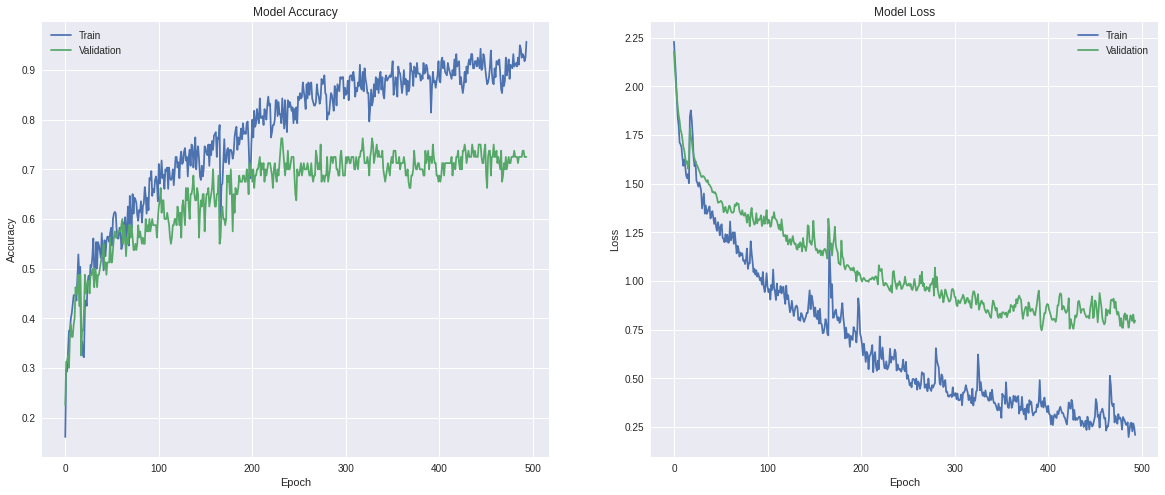

In [163]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(history_hyb.history['accuracy']) 
plt.plot(history_hyb.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
#plt.ylim(0, 1)


plt.subplot(1,2,2)
plt.plot(history_hyb.history['loss']) 
plt.plot(history_hyb.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
#plt.ylim(0, 2);

#best validation accuracy
best_acc = np.max(history_hyb.history['val_accuracy'])
print('Best validation accuracy: ', best_acc)

In [165]:
#restore weights
model_hyb.load_weights(str('1D_CNN_RNN_Classifier.hdf5'), by_name=False)

In [167]:
[loss_test, acc_test] = model_hyb.evaluate(X_test_rss, y_test)
print('Test Loss: {} \nTest Accuracy: {}'.format(loss_test, acc_test))

[loss_val, acc_val] = model_hyb.evaluate(X_val_rss, y_val)
print('Val Loss: {} \nVal Accuracy: {}'.format(loss_val, acc_val))

2/2 [==============================] - 0s 10ms/step - loss: 1.1992 - accuracy: 0.6250
Test Loss: 1.1991838216781616 
Test Accuracy: 0.625
3/3 [==============================] - 0s 10ms/step - loss: 0.9480 - accuracy: 0.7625
Val Loss: 0.9480473399162292 
Val Accuracy: 0.762499988079071


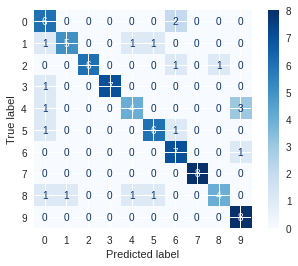

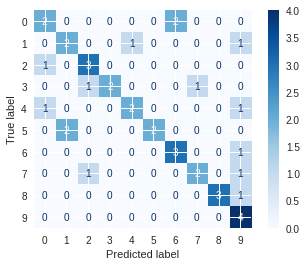

In [168]:
#generate the predictions
pred_val_hyb = model_hyb.predict(X_val_rss)
pred_test_hyb = model_hyb.predict(X_test_rss)

pred_val_hyb = np.argmax(pred_val_hyb, axis=1)
pred_test_hyb = np.argmax(pred_test_hyb, axis=1)

cm = confusion_matrix(y_val, pred_val_hyb) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classList)
disp.plot(cmap='Blues')

cm = confusion_matrix(y_test, pred_test_hyb) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classList)
disp.plot(cmap='Blues')

In [170]:
print(classification_report(y_val, pred_val_hyb))
print(classification_report(y_test, pred_test_hyb))

              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.83      0.62      0.71         8
           2       1.00      0.75      0.86         8
           3       1.00      0.88      0.93         8
           4       0.67      0.50      0.57         8
           5       0.75      0.75      0.75         8
           6       0.64      0.88      0.74         8
           7       1.00      1.00      1.00         8
           8       0.80      0.50      0.62         8
           9       0.67      1.00      0.80         8

    accuracy                           0.76        80
   macro avg       0.79      0.76      0.76        80
weighted avg       0.79      0.76      0.76        80

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.50      0.50      0.50         4
           2       0.60      0.75      0.67         4
           3       1.00 

*The hybrid model(CNN+RNN) is more complex than the TD model (32k parameters vs 17k parameters) due to the additional LSTM layer and does not generalizes as well as a simpler model for this small dataset and the specific classification task at hand, even with the dropout enabled. This is proven by the above results where the accuracy of the time distributed model is better over test set (i.e. 78% in time distributed vs 62% in hybrid).*

In [173]:
#this cell is for printing purpose
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Student_Lab_4.ipynb')

--2020-12-27 16:27:32--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1301 (1.3K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.27K  --.-KB/s    in 0s      

2020-12-27 16:27:33 (76.4 MB/s) - ‘colab_pdf.py’ saved [1301/1301]

Mounted at /content/drive/
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'